In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [49]:
df = pd.read_csv("2022_schedule.csv")
df

,date,time,home,away
0,2022-04-29,19:30:00,LA,NC
1,2022-04-30,15:00:00,POR,KC
2,2022-04-30,19:00:00,CHI,LOU
3,2022-05-01,17:00:00,WAS,RGN
4,2022-05-01,18:00:00,HOU,SD
...,...,...,...,...
132,2022-10-16,16:00:00,HOU,KC
133,2022-10-16,19:00:00,SD,CHI
134,2022-10-23,14:00:00,POR,SD
135,2022-10-23,16:30:00,RGN,KC


In [50]:
# Convert to datetime for easier manipulation
df["date"] = pd.to_datetime(df["date"])

# Shift the days so 0 maps to Sunday
df["day_of_week"] = (df["date"].dt.dayofweek + 1) % 7

# Aggregate to get the number of games for each date
df = df.groupby("day_of_week").agg(count=("date", "count"))
idx = range(0, 7)
df = df.reindex(idx, fill_value=0)
df = df.reset_index()

df

,day_of_week,count
0,0,51
1,1,1
2,2,2
3,3,16
4,4,0
5,5,23
6,6,44


<Figure size 576x360 with 0 Axes>

<Figure size 9600x6000 with 0 Axes>

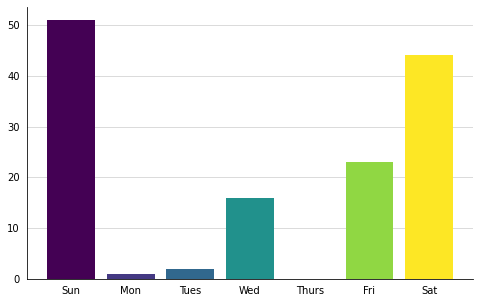

In [65]:
plt.clf()
plt.rcParams["figure.figsize"] = (8, 5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: y / 6

# Plot data
plt.bar(df["day_of_week"], df["count"], color=my_cmap(rescale(df["day_of_week"])))

# Axes and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color="lightgray")

# X tick labels
days = ["", "Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"]
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda self, i: days[i] if i >= 0 and i < len(days) else "")
)